In [38]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
# use pandas to load data into a DataFrame
columns = ["sl", "sw", "pl", "pw", "classname"]
df = pd.read_csv("iris.data", header=None, names=columns)
df.shape # (rows, columns)

(150, 5)

In [40]:
df.head()

,sl,sw,pl,pw,classname
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
target_column = 'classname'

In [42]:
df[target_column].replace(to_replace={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)

In [43]:
# Potability is the target variable, how many of each class are there?
df[target_column].value_counts()

classname
0    50
1    50
2    50
Name: count, dtype: int64

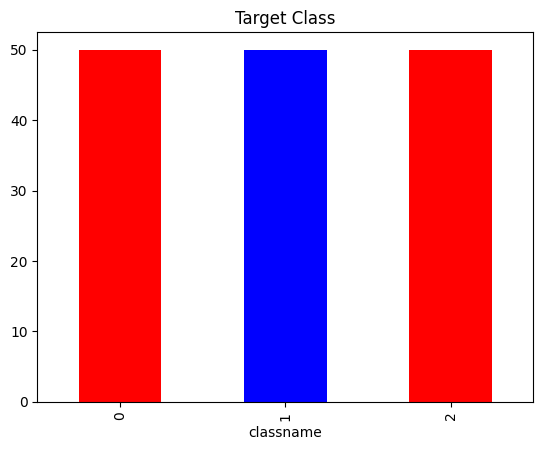

In [44]:
df[target_column].value_counts().plot(kind="bar", color=["red", "blue"], title = "Target Class");

In [45]:
# (1998/(1998+1278))*100 # jumlah persenan imbalance

In [46]:
# 1998-1278 # jumlah data imbalance

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sl         150 non-null    float64
 1   sw         150 non-null    float64
 2   pl         150 non-null    float64
 3   pw         150 non-null    float64
 4   classname  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [48]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN
# count terkecil terletak pada Sulfate 2945

,sl,sw,pl,pw,classname
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [49]:
df.isna().sum() # dari sini juga terlihat

sl           0
sw           0
pl           0
pw           0
classname    0
dtype: int64

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
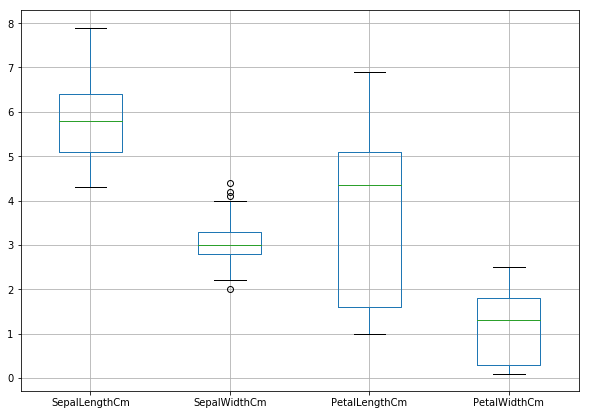

In [50]:
column_list = list(df.columns)
column_list = column_list[:-1]
column_list

['sl', 'sw', 'pl', 'pw']

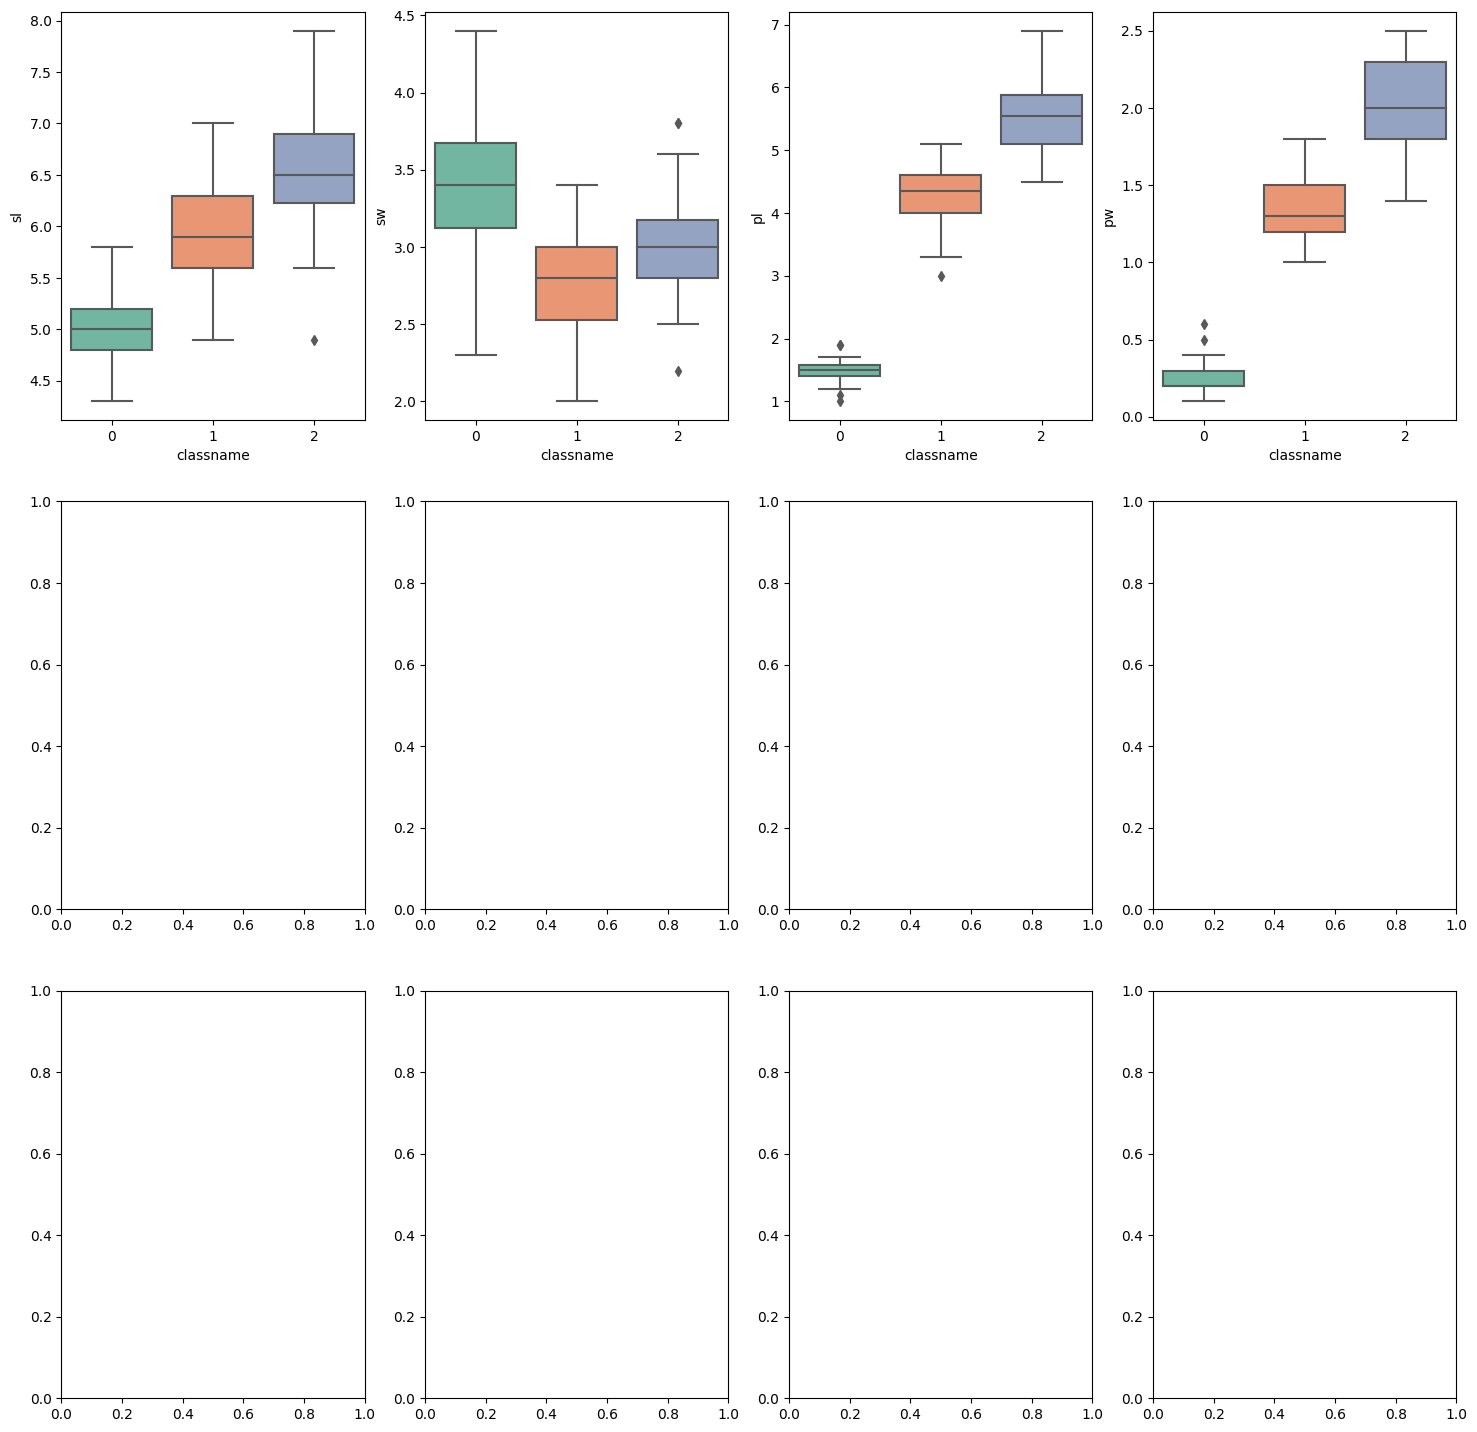

In [51]:
row, col = 3, 4
fig, axes = plt.subplots(row, col, figsize=(18, 18))
i, j = 0, 0
for z, column in enumerate(column_list):
    sns.boxplot(ax=axes[i,j], data=df, palette="Set2", x=target_column, y=column_list[z])
    if j == col-1:
        j = 0
        i += 1
    else:
        j += 1

### Distribusi data setiap fitur dengan histograms

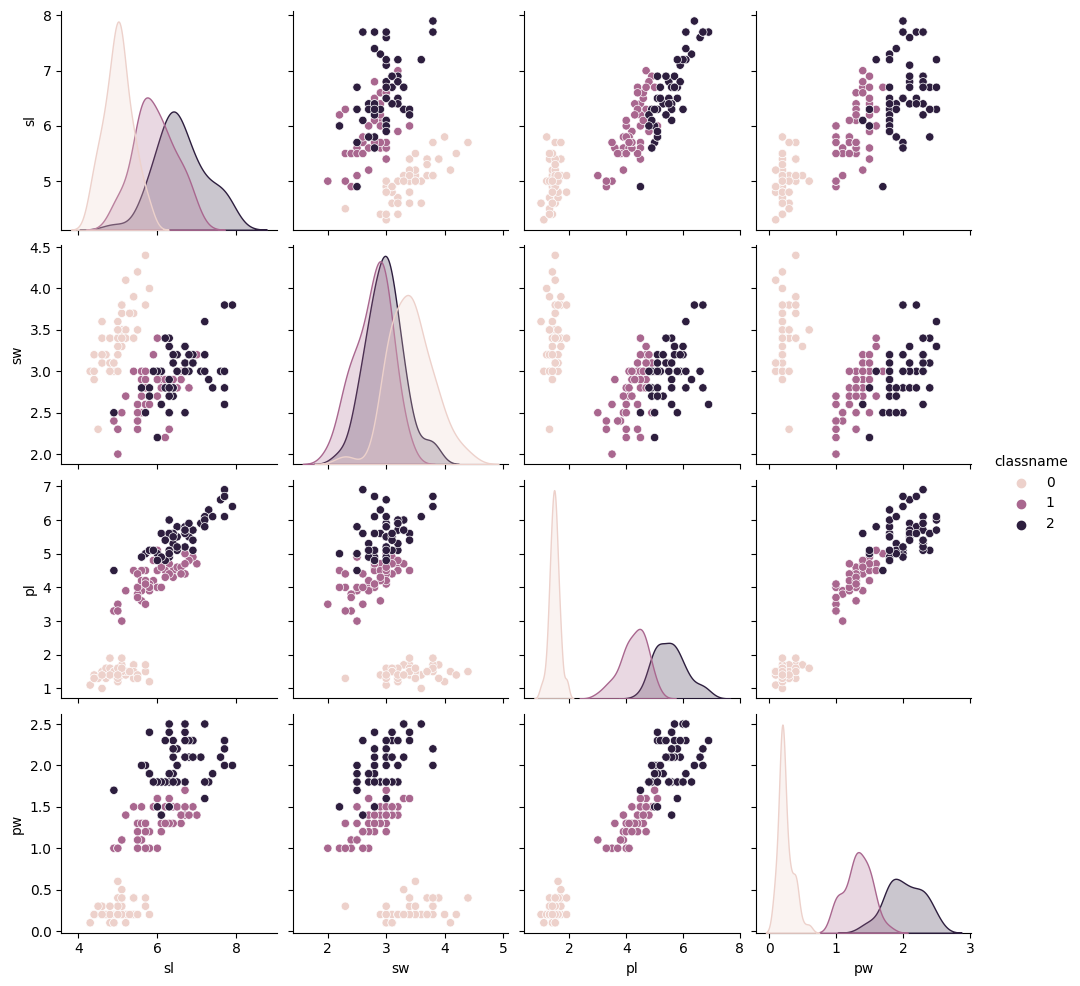

In [54]:
sns.pairplot(df, hue=target_column)

### Correlation Matrix

- apakah variable punya ketergantungan atau tidak
- Kalo korelasinya 1: berkorelasi, negatif: tidak ada korelasinya 
- BAGUS KALO POSITIF ATAU NEGATIF, KALO 0 → tidak ada korelasinya

#### Correlation Matrix yang baik

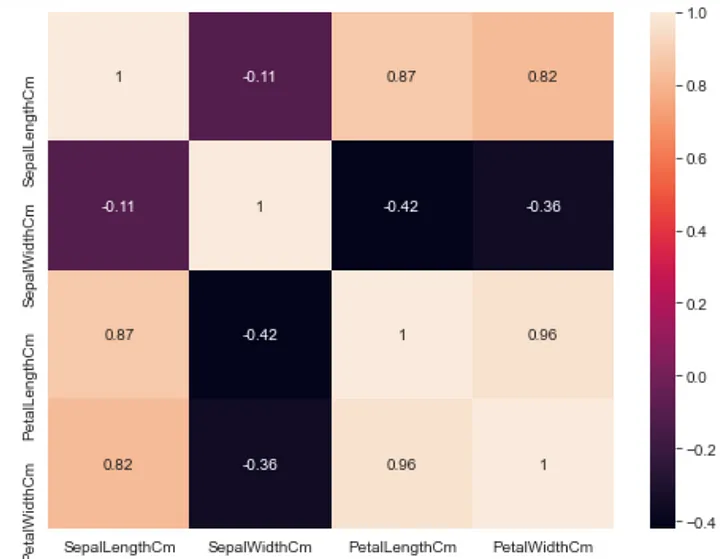

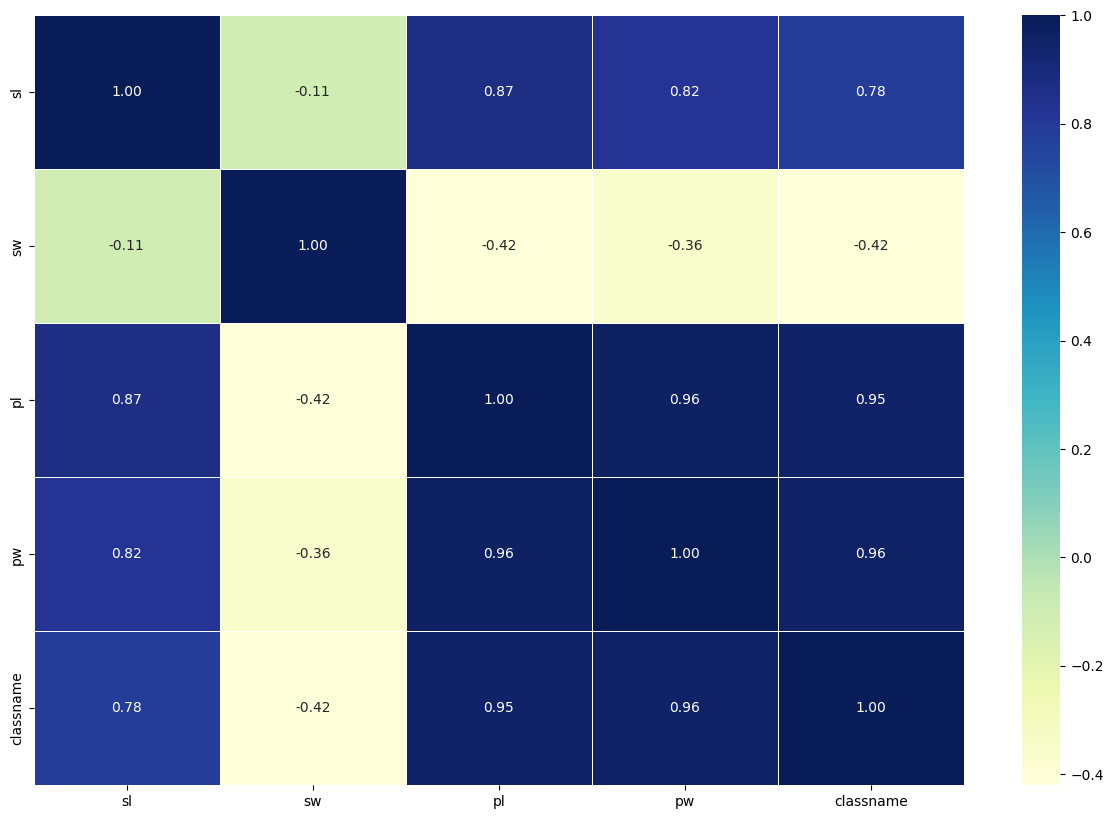

In [55]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [ ]:
df.to_csv('iris_data.csv', index=False)